<h1 style = "font-size:3rem;color:DarkCyan">Feature Comparison between audio files</h1>

In [1]:
#import libraries
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import librosa, librosa.display 
import IPython.display as ipd
import scipy
import os
import pandas as pd

import sklearn

In [2]:
# import dataset, in this case different percussion sounds

filenames = os.listdir('./data')
print(f'Number of audio files: {len(filenames)} ')


Number of audio files: 167 


<h2 style = "font-size:2rem;color:DarkCyan">Extracting features</h2>

- Extracting features (Bandwidth, central spectroid, and zero-crossing rate) for each audio file, and store in a NxF matrix
- Giving a label

In [85]:
def extract_features(data):
    return [
        np.mean(librosa.feature.spectral_centroid(y = data)),
        np.mean(librosa.feature.spectral_bandwidth(y = data)),
        np.mean(librosa.feature.spectral_flatness(y = data)),
        np.mean(librosa.feature.spectral_rolloff(y = data)),
        np.mean(librosa.feature.mfcc(y = data)),
        np.mean(librosa.feature.spectral_contrast(y = data)),
        np.mean(librosa.feature.zero_crossing_rate(y = data)),
        np.mean(librosa.feature.rms(y = data))
        
    ]

#np.mean(librosa.feature.zero_crossing_rate(y = data)),

In [11]:
def get_label(name):
    if name.find('clap') != -1:
        return 0
    elif name.find('cymbal') != -1:
        return 1
    elif name.find('kick') != -1:
        return 2
    else:
        return 3

In [115]:
sr = 48000
features = np.zeros((len(filenames), 8))
labels = np.zeros(len(filenames))

idx = 0

for name in filenames:
    data, dummy = librosa.load('./data/'+name, sr = sr, mono=True)
    
    # fill prediction array with correct label 
    labels[idx] = get_label(name)
    
    # extract features
    features[idx] = extract_features(data)
    
    idx +=1
    

<h2 style = "font-size:2rem;color:DarkCyan">Plotting features</h2>

<IPython.core.display.Javascript object>


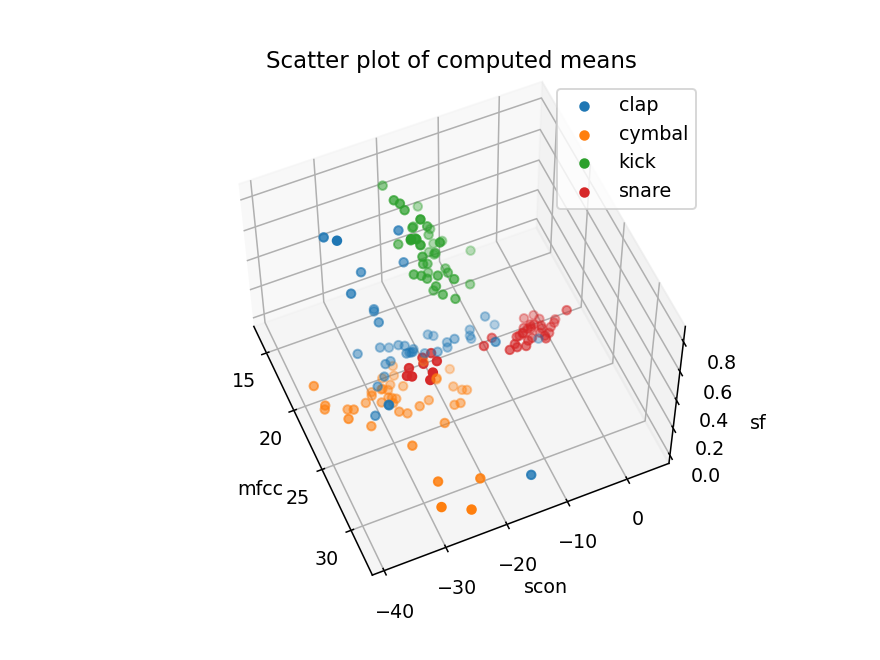

In [87]:
f_dict = {'sc' : 0, 'sb' : 1, 'sf': 2, 'sr' : 3, 'scon' : 4, 'mfcc' : 5,'zcr' : 6, 'rms': 7}
# choose three features

f1 = 'mfcc'
f2 = 'scon'
f3 = 'sf'

# plot the features
%matplotlib notebook
#fig = plt.figure(figsize = (15, 9))
ax = plt.axes(projection ="3d")
ax.scatter3D(features[np.where(labels == 0),f_dict[f1]], features[np.where(labels == 0),f_dict[f2]], features[np.where(labels == 0),f_dict[f3]], label = 'clap')
ax.scatter3D(features[np.where(labels == 1),f_dict[f1]], features[np.where(labels == 1),f_dict[f2]], features[np.where(labels == 1),f_dict[f3]], label = 'cymbal')
ax.scatter3D(features[np.where(labels == 2),f_dict[f1]], features[np.where(labels == 2),f_dict[f2]], features[np.where(labels == 2),f_dict[f3]], label = 'kick')
ax.scatter3D(features[np.where(labels == 3),f_dict[f1]], features[np.where(labels == 3),f_dict[f2]], features[np.where(labels == 3),f_dict[f3]], label = 'snare')


#plt.scatter(feature2[:,0], feature2[:,1])
plt.title('Scatter plot of computed means')
ax.set_xlabel(f1)
ax.set_ylabel(f2)
ax.set_zlabel(f3)
ax.legend()

<h2 style = "font-size:2rem;color:DarkCyan">Scale features & plot again</h2>

- scale features for better comparison (after this step features will present zero mean and unit variance)

In [116]:
print('Mean and std before scaling',np.mean(features, axis=0),np.std(features, axis=0))

features = sklearn.preprocessing.scale(features)

print('Mean and std after scaling',np.mean(features, axis=0),np.std(features, axis=0))

Mean and std before scaling [ 1.60794752e+03  1.46614746e+03  1.78297782e-01  3.14417057e+03
 -1.81131847e+01  2.06562447e+01  8.94566901e-02  5.07136850e-02] [8.95756004e+02 7.02382780e+02 2.59673601e-01 1.77189515e+03
 9.59610701e+00 2.78300000e+00 6.32586899e-02 8.92786962e-02]
Mean and std after scaling [-9.67954924e-16 -3.90240069e-16  7.97765048e-18  4.21485867e-16
  2.88857428e-16  1.58090440e-15 -5.63753967e-16  4.48742839e-17] [1. 1. 1. 1. 1. 1. 1. 1.]


<IPython.core.display.Javascript object>


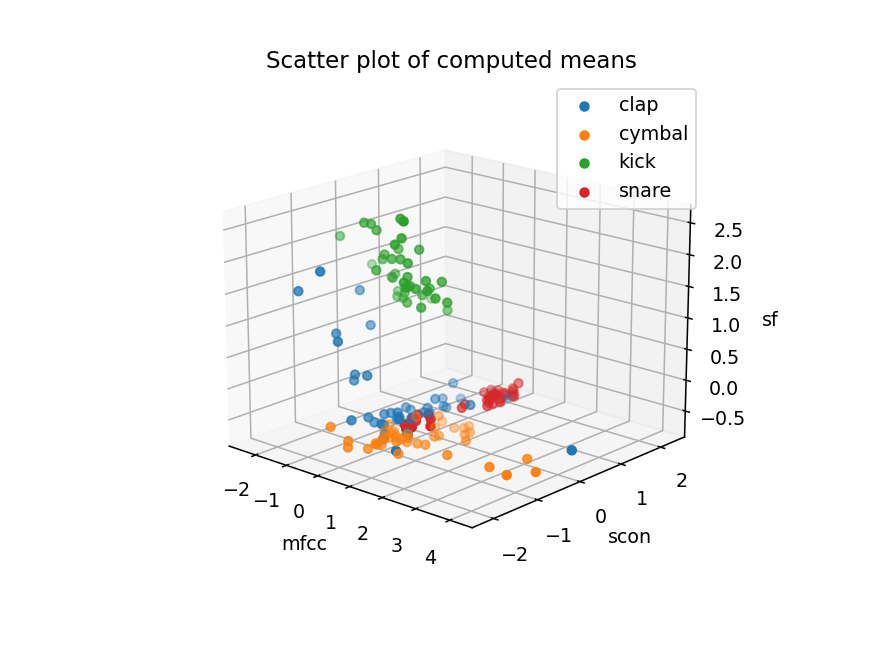

In [90]:
# plot the features
%matplotlib notebook
#fig = plt.figure(figsize = (15, 9))
ax = plt.axes(projection ="3d")
ax.scatter3D(features[np.where(labels == 0),f_dict[f1]], features[np.where(labels == 0),f_dict[f2]], features[np.where(labels == 0),f_dict[f3]], label = 'clap')
ax.scatter3D(features[np.where(labels == 1),f_dict[f1]], features[np.where(labels == 1),f_dict[f2]], features[np.where(labels == 1),f_dict[f3]], label = 'cymbal')
ax.scatter3D(features[np.where(labels == 2),f_dict[f1]], features[np.where(labels == 2),f_dict[f2]], features[np.where(labels == 2),f_dict[f3]], label = 'kick')
ax.scatter3D(features[np.where(labels == 3),f_dict[f1]], features[np.where(labels == 3),f_dict[f2]], features[np.where(labels == 3),f_dict[f3]], label = 'snare')


#plt.scatter(feature2[:,0], feature2[:,1])
plt.title('Scatter plot of computed means')
ax.set_xlabel(f1)
ax.set_ylabel(f2)
ax.set_zlabel(f3)
ax.legend()

<h2 style = "font-size:2rem;color:DarkCyan">Correlation Matrix</h2>

In [117]:
feature_names = ['sc','bw','sf', 'sr', 'scon' , 'mfcc' ,'zcr', 'rms']
df = pd.DataFrame(features, columns=feature_names)
corr = df.corr()
corr.style.format(na_rep='MISS', precision=3)  
corr.style.background_gradient(cmap='coolwarm')
# 'RdBu_r', 'BrBG_r', & PuOr_r are other good diverging colormaps

# Fill diagonal and upper half with NaNs
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corr[mask] = np.nan
corr.style.format(na_rep='MISS', precision=3) 
(corr
 .style
 .background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)
 .highlight_null(null_color='#f1f1f1')  # Color NaNs grey
 )

,sc,bw,sf,sr,scon,mfcc,zcr,rms
sc,nan,nan,nan,nan,nan,nan,nan,nan
bw,0.915217,nan,nan,nan,nan,nan,nan,nan
sf,-0.687226,-0.721321,nan,nan,nan,nan,nan,nan
sr,0.979052,0.967693,-0.681367,nan,nan,nan,nan,nan
scon,-0.285682,-0.346253,-0.100810,-0.318451,nan,nan,nan,nan
mfcc,0.397573,0.333714,-0.547529,0.357100,-0.084360,nan,nan,nan
zcr,0.900415,0.689934,-0.548818,0.812657,-0.273633,0.403553,nan,nan
rms,-0.178906,-0.229261,-0.116176,-0.196010,0.479864,0.184491,-0.160377,nan


<h2 style = "font-size:2rem;color:DarkCyan">Dimensionality Reduction</h2>

In [118]:
# from the correlation matrix can be seen that there are 
# spectral centroid and bandwidth are strongly correrelated 
# with other features, these can be discarded to simplify the model
print(np.shape(features))
features = features[:,2:]
print(np.shape(features))
feature_names = feature_names[2:]

(167, 8)
(167, 6)


<h2 style = "font-size:2rem;color:DarkCyan">Save Features</h2>

- scale features for better comparison (after this step features will present zero mean and unit variance)

In [119]:
#merging everything into a single data structure
dataset = pd.DataFrame(features)
dataset.columns = feature_names #naming the features
dataset['label'] = labels
dataset['filename'] = filenames

#we can save the dataset to a file to resume working without re-computing the features (unless you want to change them)
dataset.to_csv('dataset.csv')
dataset

,sf,sr,scon,mfcc,zcr,rms,label,filename
0,-0.650937,1.103137,0.201820,-0.181805,2.359166,-0.087440,0.0,clap00.wav
1,-0.455283,1.621357,0.319636,-0.156507,1.448470,0.460283,0.0,clap01.wav
2,-0.582337,1.217733,0.004219,-0.096929,1.530512,0.112806,0.0,clap02.wav
3,-0.481064,1.412264,-1.139505,0.943533,2.719303,0.093284,0.0,clap03.wav
4,-0.677210,0.038988,-1.122057,0.161869,0.490405,-0.428324,0.0,clap04.wav
...,...,...,...,...,...,...,...,...
162,-0.551290,1.117861,-0.087366,0.171507,1.413513,-0.314272,3.0,snare_37.wav
163,-0.601877,0.814952,-0.097283,-0.141917,0.905417,-0.293384,3.0,snare_38.wav
164,-0.628628,0.937689,-0.308812,0.533378,0.223181,-0.347412,3.0,snare_39.wav
165,-0.603429,1.116316,-0.261414,-0.104417,0.660124,-0.320820,3.0,snare_40.wav
